In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('california.csv.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [40]:
print('done')

done


In [41]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()


In [42]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [43]:
data = pd.DataFrame(california_housing['data'],columns=california_housing.feature_names)

data['price'] = california_housing['target']

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
data.shape

(20640, 9)

In [45]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [47]:
data['HouseAge'].value_counts().sort_values()

HouseAge
1.0        4
51.0      48
2.0       58
3.0       62
49.0     134
50.0     136
6.0      160
7.0      175
48.0     177
4.0      191
47.0     198
9.0      205
8.0      206
12.0     238
5.0      244
46.0     245
11.0     254
10.0     264
45.0     294
41.0     296
13.0     302
40.0     304
43.0     353
44.0     356
42.0     368
39.0     369
38.0     394
22.0     399
14.0     412
21.0     446
23.0     448
31.0     458
29.0     461
20.0     465
28.0     471
30.0     476
24.0     478
27.0     488
19.0     502
15.0     512
37.0     537
32.0     565
25.0     566
18.0     570
33.0     615
26.0     619
34.0     689
17.0     698
16.0     771
35.0     824
36.0     862
52.0    1273
Name: count, dtype: int64

In [48]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [49]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

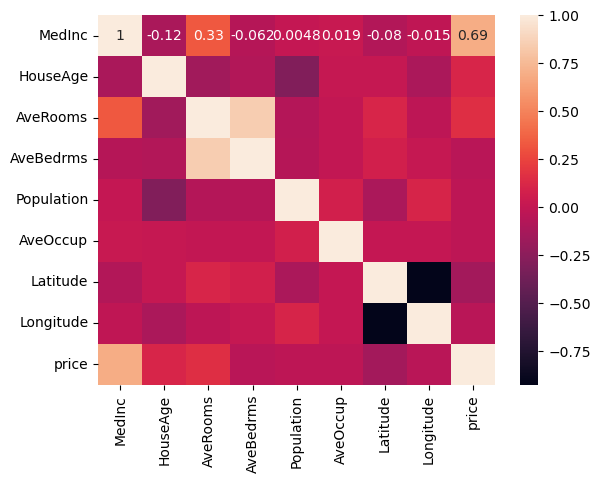

In [50]:
sns.heatmap(data.corr(), annot = True)
plt.show()

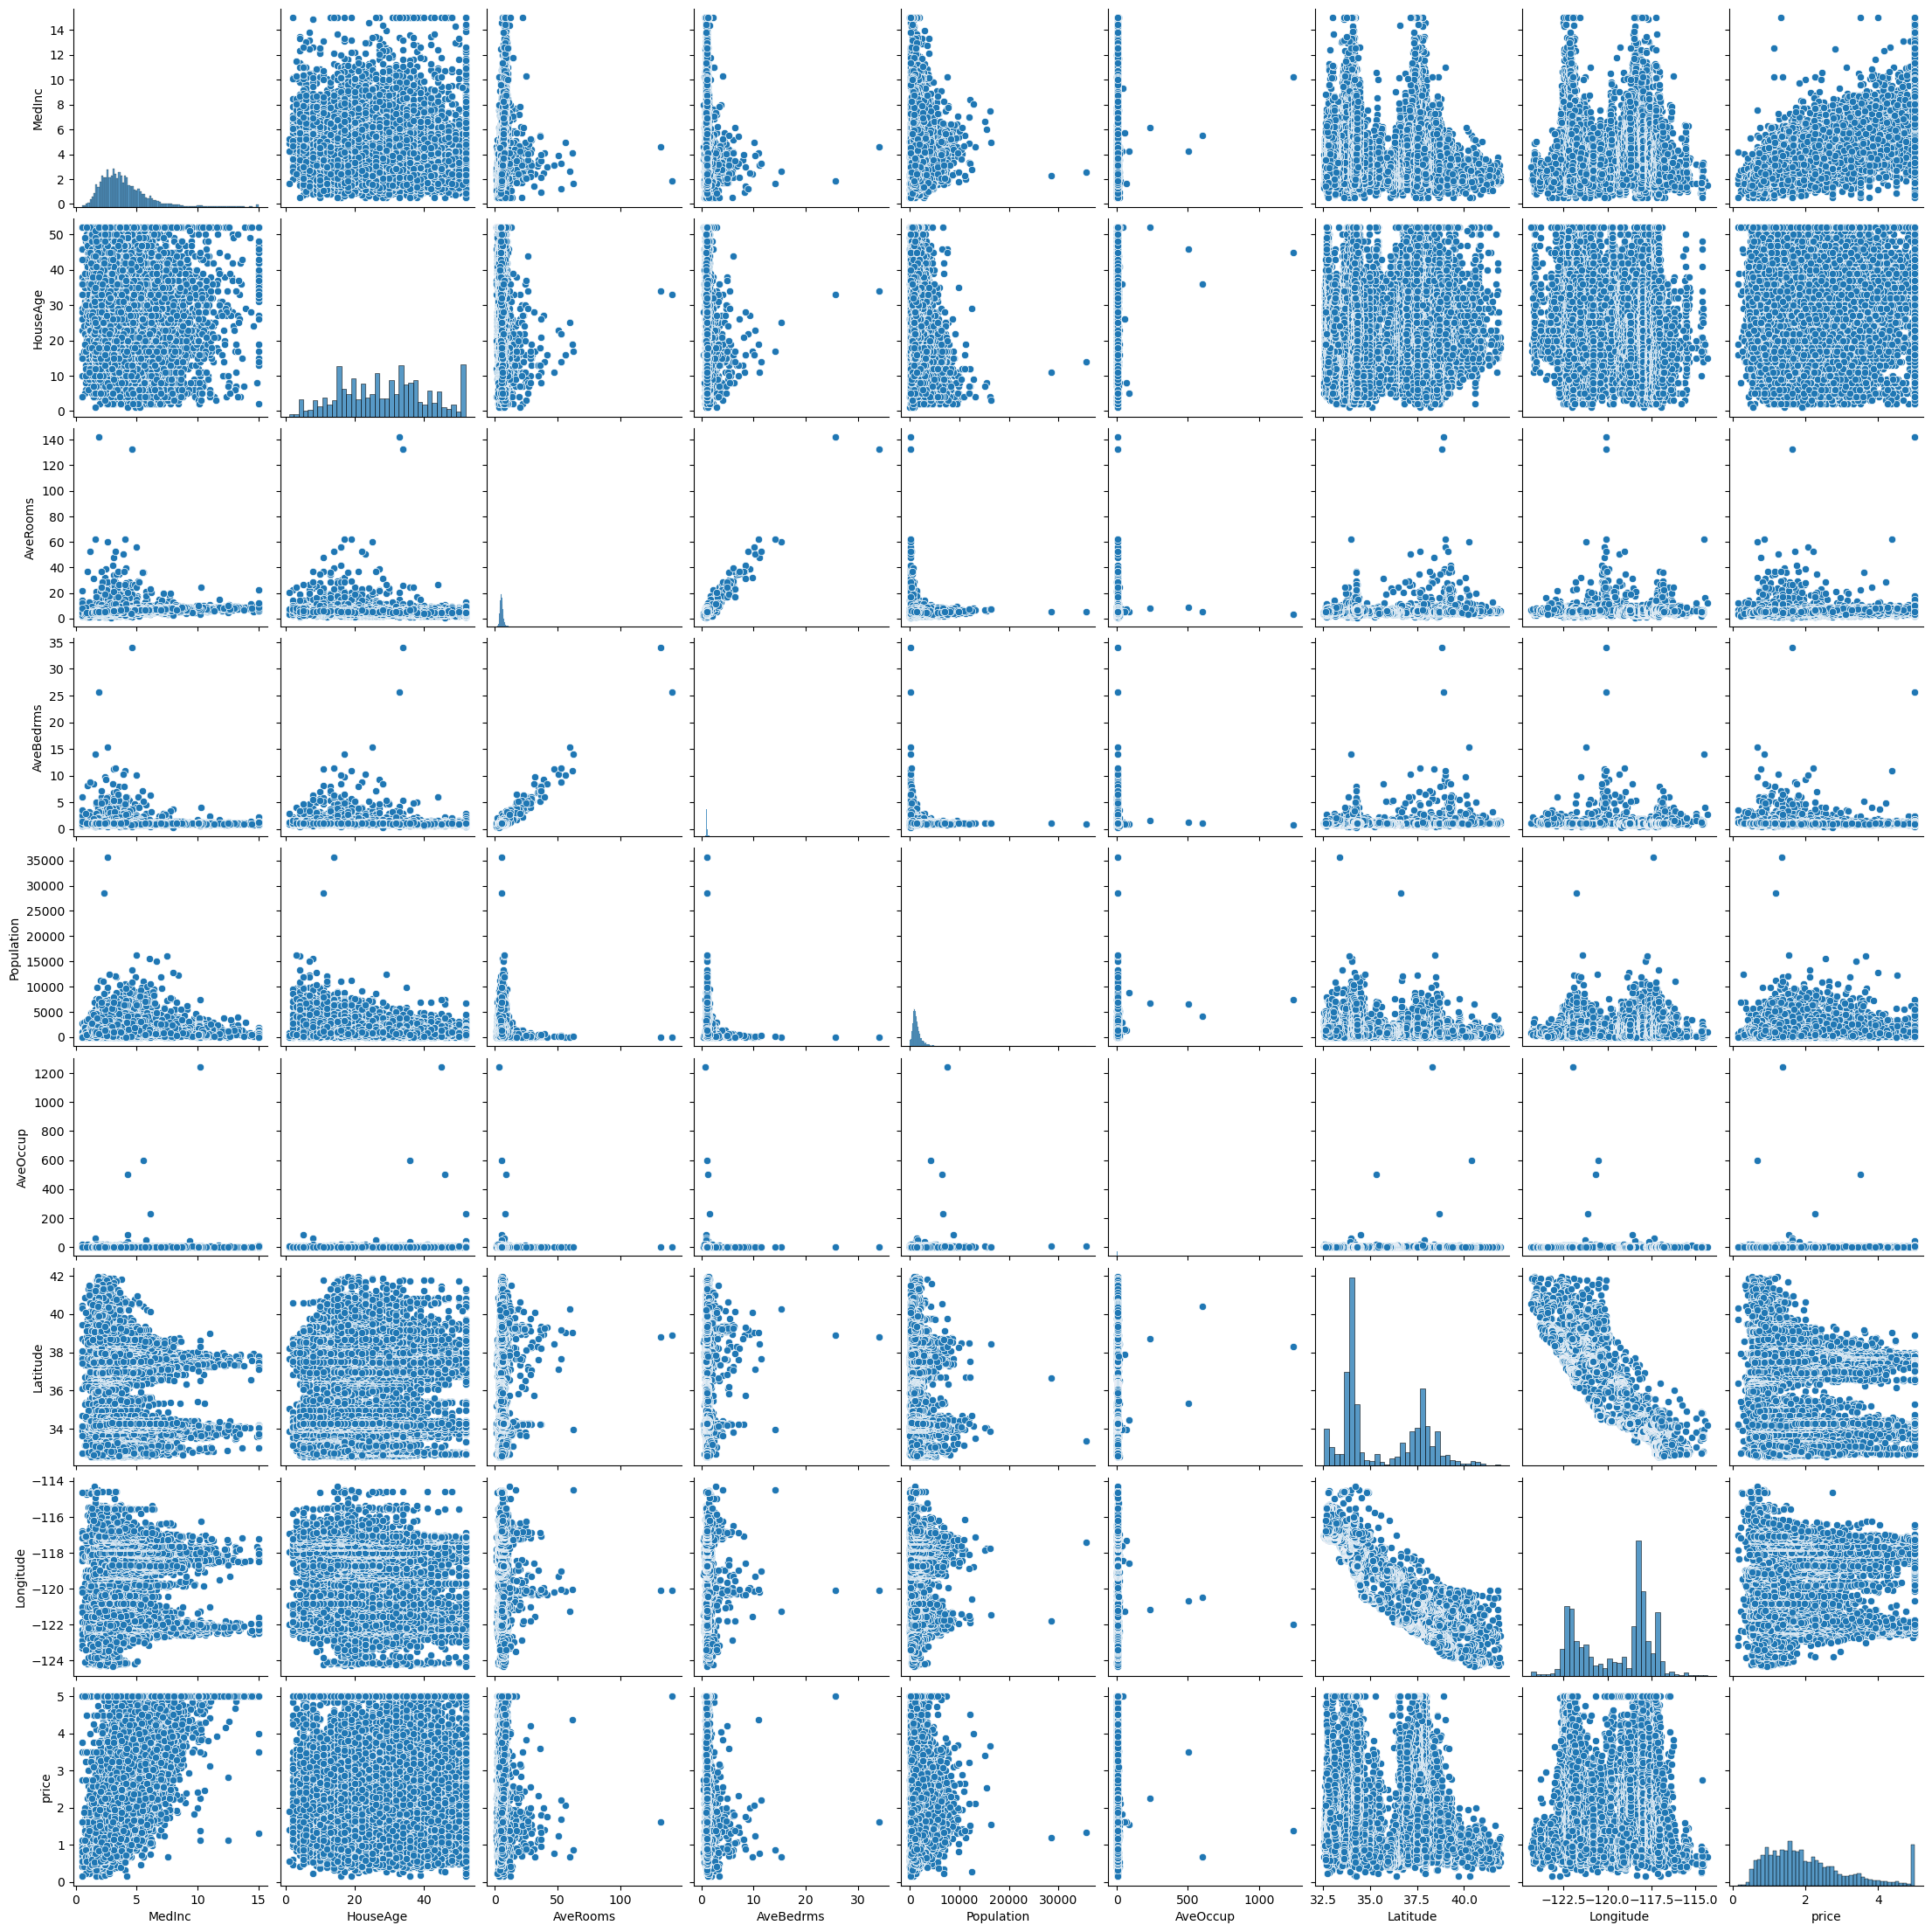

In [51]:
sns.pairplot(data)
plt.show()

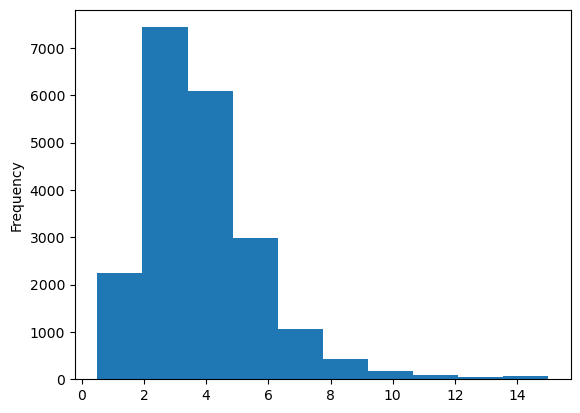

In [52]:
data['MedInc'].plot.hist()
plt.show()

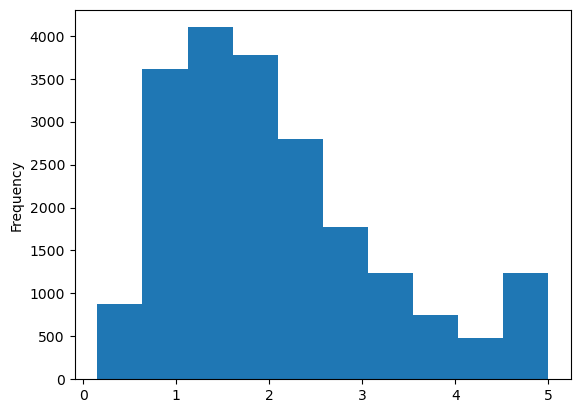

In [53]:
data['price'].plot.hist()
plt.show()

In [54]:
X = data.drop('price',axis = 1)
X.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19151,1.6033,14.0,4.641791,1.101493,493.0,1.471642,38.35,-122.7


In [55]:
scaler = StandardScaler()

X_scalled = scaler.fit_transform(X)
X_scalled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [56]:
from sklearn.model_selection import train_test_split

X = X_scalled
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 35)

print('done')



done


In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred_lr = lr.predict(X_test)

In [59]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Performance:')
print('MAE:', mae_lr)
print('MSE:', mse_lr)
print('RMSE:', rmse_lr)
print('R2:', r2_lr)

Linear Regression Performance:
MAE: 0.5347061735755898
MSE: 0.5332912873895141
RMSE: 0.7302679558829855
R2: 0.6047062398700987


In [60]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Linear Regression Performance:')
print('MAE:', mae_ridge)
print('MSE:', mse_ridge)
print('RMSE:', rmse_ridge)
print('R2:', r2_ridge)

Linear Regression Performance:
MAE: 0.5347055878577933
MSE: 0.5332915031836686
RMSE: 0.7302681036329525
R2: 0.6047060799160835


In [61]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso= lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Linear Regression Performance:')
print('MAE:', mae_lasso)
print('MSE:', mse_lasso)
print('RMSE:', rmse_lasso)
print('R2:', r2_lasso)

Linear Regression Performance:
MAE: 0.6205751525815043
MSE: 0.6812532714597128
RMSE: 0.8253806827517305
R2: 0.4950317516074214


In [62]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [63]:
X_train

array([[ 0.70051901, -1.79889009,  0.10811095, ..., -0.0600856 ,
         1.10873067, -1.25795692],
       [-0.95578178, -1.24268354, -0.04710467, ..., -0.0795578 ,
        -0.79678867,  1.31755758],
       [-0.83113549,  0.66431034, -0.68764041, ...,  0.07230461,
        -0.7780612 ,  0.65870503],
       ...,
       [ 0.37174336,  0.26701995,  0.36867245, ..., -0.03610729,
        -0.53928605,  0.80345294],
       [ 0.24804454, -0.52756083,  0.10495862, ...,  0.15688201,
         0.7903638 , -1.13317424],
       [ 0.06102247,  0.58485227,  0.37634853, ..., -0.03745337,
        -0.67037829,  0.62376588]])

In [64]:
import statsmodels.api as sm
new_X_train = sm.add_constant(X_train)

ols_model = sm.OLS(y_train,new_X_train).fit()
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3180.
Date:                Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:15:53   Log-Likelihood:                -18065.
No. Observations:               16512   AIC:                         3.615e+04
Df Residuals:                   16503   BIC:                         3.622e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0653      0.006    367.152      0.000       2.054       2.076
x1             0.8227      0.009     93.746      0.000       0.805       0.840
x2             0.1171      0.006     18.706      0.000       0.105       0.129
x3            -0.2596      0.016    -16.294      0.000      -0.291      -0.228
x4             0.2946      0.014     20.337      0.000       0.266       0.323
x5            -0.0038      0.006     -0.642      0.521      -0.015       0.008
x6            -0.0423      0.005     -7.878      0.000      -0.053      -0.032
x7            -0.9037      0.017    -52.973      0.000      -0.937      -0.870
x8            -0.8738      0.017    -52.211      0.000      -0.907      -0.841
==============================================================================
Omnibus:                     3429.743   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11218.324
Skew:                           1.049   Prob(JB):                         0.00
Kurtosis:                       6.450   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
new_X_test = sm.add_constant(X_test)

y_pred_ols = ols_model.predict(new_X_test)

In [66]:
mae_ols = mean_absolute_error(y_test, y_pred_ols)
mse_ols = mean_squared_error(y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print('Linear Regression Performance:')
print('MAE:', mae_ols)
print('MSE:', mse_ols)
print('RMSE:', rmse_ols)
print('R2:', r2_ols)


Linear Regression Performance:
MAE: 0.5347061735755898
MSE: 0.533291287389514
RMSE: 0.7302679558829854
R2: 0.6047062398700989


In [67]:
model_info = {
    'Model': ['Linear Regression','Ridge Regression', 'Lasso Regression', 'OLS Method'],
    'MAE': [mae_lr, mae_ridge, mae_lasso, mae_ols],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_ols],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_ols],
    'R-SQUARED': [r2_lr, r2_ridge, r2_lasso, r2_ols]
}

performance = pd.DataFrame(model_info)
performance

,Model,MAE,MSE,RMSE,R-SQUARED
0,Linear Regression,0.534706,0.533291,0.730268,0.604706
1,Ridge Regression,0.534706,0.533292,0.730268,0.604706
2,Lasso Regression,0.620575,0.681253,0.825381,0.495032
3,OLS Method,0.534706,0.533291,0.730268,0.604706


In [68]:
performance[performance['R-SQUARED'] == performance['R-SQUARED'].max()]

,Model,MAE,MSE,RMSE,R-SQUARED
3,OLS Method,0.534706,0.533291,0.730268,0.604706


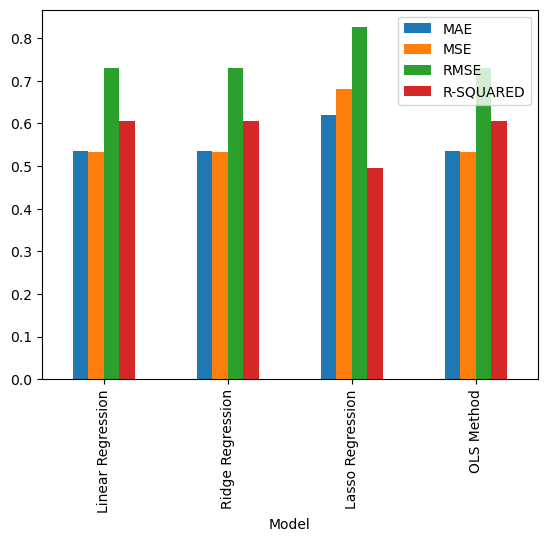

In [69]:
performance.plot(kind='bar', x= 'Model')
plt.show()

In [70]:
import joblib

joblib.dump(ridge_model, 'best_model.pkl')

['best_model.pkl']

In [71]:
best_model = joblib.load('best_model.pkl')

new_data = np.array([[7.2574, 52.0, 8.288136, 1.073446, 496.0, 2.802260, 37.85, -122.24]])

scaled_new_data = scaler.transform(new_data)


predicted_price = best_model.predict(scaled_new_data)

print('Predicted Price:', predicted_price)

Predicted Price: [3.66522025]


In [72]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()


print(california.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [74]:



X = california.data
y = california.target
target_names = ['MedHouseVal']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


print("Target Names:", target_names)

Shape of X: (20640, 8)
Shape of y: (20640,)
Target Names: ['MedHouseVal']


In [75]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [76]:
import pandas as pd

# Load your dataset (correct file path and name)
california = pd.read_csv('california.csv.csv')

# Print the first few rows and column names to inspect the structure
print(california.head())
print(california.columns)




   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      

In [77]:
# Assuming you have identified the correct target column name from the output
target_column_name = 'correct_target_column_name'

# Drop the target column (if it exists)
if target_column_name in california.columns:
    X = california.drop(target_column_name, axis=1)  # Features
    y = california[target_column_name]  # Target

    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the model (example with RandomForestRegressor)
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)
else:
    print(f"Target column '{target_column_name}' not found in dataset.")
    # Handle the situation where the target column is missing or incorrectly named


Target column 'correct_target_column_name' not found in dataset.


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load your dataset (correct file path and name)
california = pd.read_csv('california.csv.csv')

# Print the first few rows and column names to inspect the structure
print(california.head())
print(california.columns)

# Assuming 'correct_target_column_name' is your target variable and other columns are features
target_column_name = 'correct_target_column_name'

# Drop the target column (if it exists)
if target_column_name in california.columns:
    X = california.drop(target_column_name, axis=1)  # Features
    y = california[target_column_name]  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the model (example with RandomForestRegressor)
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)
else:
    print(f"Target column '{target_column_name}' not found in dataset.")
    # Handle the situation where the target column is missing or incorrectly named


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
california = pd.read_csv('california.csv.csv')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [82]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset
california = fetch_california_housing()

# Extract features (X) and target (y)
X = california.data  # Features
y = california.target  # Target (median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with model training and evaluation


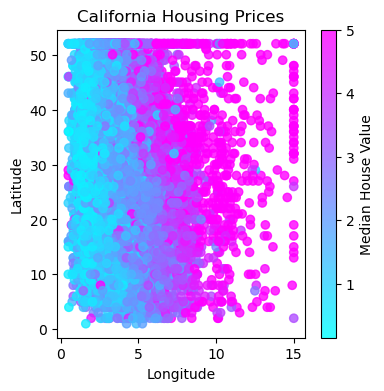

In [83]:


X = california.data
y = california.target


plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool', alpha=0.8)
plt.colorbar(label='Median House Value')  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.show()

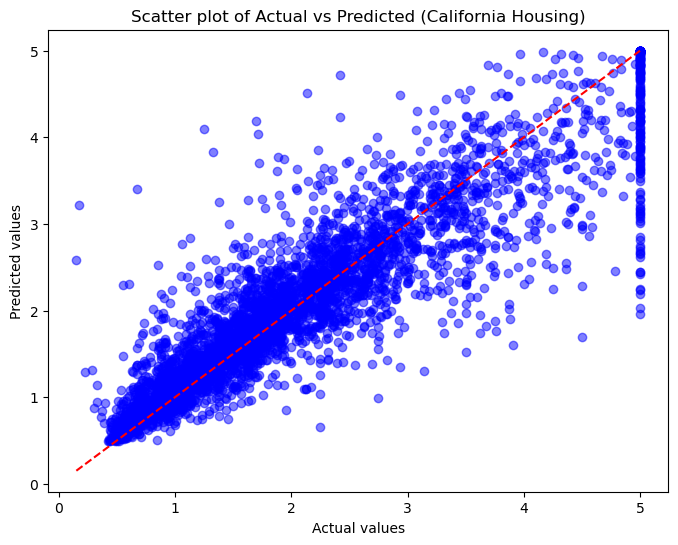

In [84]:

y_pred = rf.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Scatter plot of Actual vs Predicted (California Housing)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Add a line of best fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Show plot
plt.show()

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,\
confusion_matrix, accuracy_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

y_pred = rf_regressor.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.26
R^2 Score: 0.81


In [87]:
y_pred = rf_regressor.predict(X_test_scaled)


print(y_pred)

[0.5095    0.74161   4.9232571 ... 4.7582187 0.71379   1.65772  ]


In [88]:
from sklearn.metrics import classification_report,\
confusion_matrix, accuracy_score

In [89]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


california = fetch_california_housing()


X = california.data
y = california.target  # Continuous target variable



y_binary = (y > california.target.mean()).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


y_pred = rf_classifier.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")


Accuracy Score: 0.89


In [90]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2283,  193],
       [ 273, 1379]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2476
           1       0.88      0.83      0.86      1652

    accuracy                           0.89      4128
   macro avg       0.89      0.88      0.88      4128
weighted avg       0.89      0.89      0.89      4128



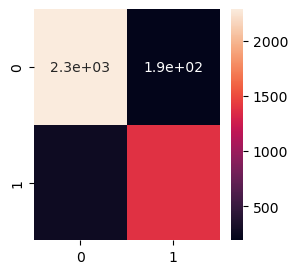

In [92]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True)
plt.show()

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [94]:
from sklearn.metrics import accuracy_score, \
confusion_matrix, classification_report


In [95]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)


print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [96]:
df['target'] = california.target


X = df.drop('target', axis=1)
y = df['target']


print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [97]:
X = pd.get_dummies(X,dtype=int,drop_first=True)
X.shape

(20640, 8)

In [98]:
y = pd.get_dummies(y,dtype=int,drop_first=True)
y.shape

(20640, 3841)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
model = DecisionTreeRegressor()

model.fit(X_train,y_train)

DecisionTreeRegressor()

In [102]:
y_pred = model.predict(X_test)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
model.score(X_test,y_test)

-0.19742970157035789

In [104]:
accuracy_score(y_test,y_pred)

0.02374031007751938

In [105]:
from sklearn.metrics import classification_report,\
confusion_matrix, accuracy_score

<Axes: >

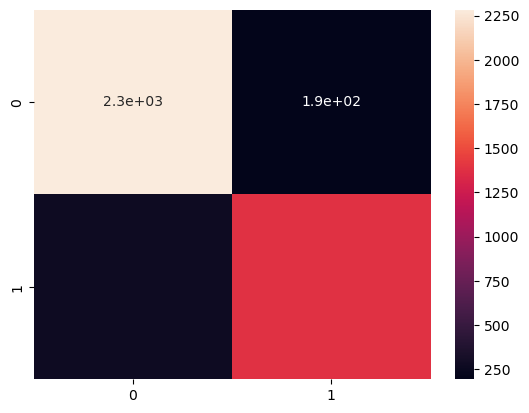

In [106]:
import seaborn as sns

sns.heatmap(cm,annot=True)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00    

In [108]:

import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
data = fetch_california_housing()

In [110]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [111]:
df = pd.DataFrame(data['data'],
                 columns = data['feature_names'])

df['target'] = data['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [112]:


# Create a KNN regressor with k neighbors
model = KNeighborsRegressor(n_neighbors=k)

# Fit the regressor to the training data
model.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=15)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=42, test_size=0.2)

model = KNeighborsRegressor(n_neighbors=5)

In [116]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california = fetch_california_housing()

# Extract features (X) and target (y)
X = california.data  # Features
y = california.target  # Target (median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.43


In [117]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
california = fetch_california_housing()


X = california.data
y = california.target  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)





mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.43


In [118]:
y_pred = knn_regressor.predict(X_test_scaled)

In [119]:
y_pred = knn_regressor.predict(X_test_scaled)

print("Predicted Values:")
print(y_pred)

Predicted Values:
[0.4988   0.7646   4.750006 ... 4.761208 0.692    1.8944  ]


In [120]:
score = knn_regressor.score(X_test_scaled, y_test)
print(f"Model Score (R²): {score:.2f}")

Model Score (R²): 0.67


In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of neighbors (k) for KNN
k = 5

# Create a KNN regressor with k neighbors
model = KNeighborsRegressor(n_neighbors=k)

# Fit the regressor to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.1186823858768293
Mean Absolute Error: 0.8127975600775195
R-squared: 0.14631049965900345


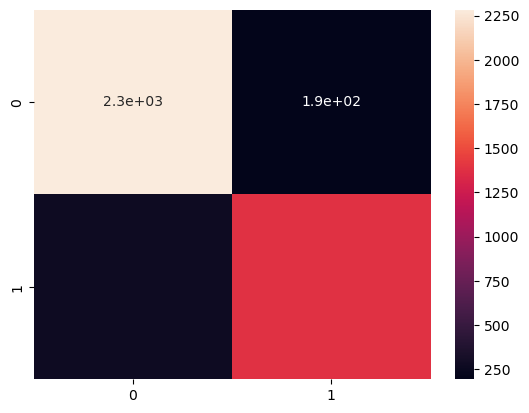

In [122]:
sns.heatmap(cm,annot=True,fmt = '.2g')
plt.show()

In [123]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


california = fetch_california_housing()


X = california.data
y = california.target

best_k = None
best_score = -float('inf')  # Initialize with a very low score


for k in range(1, 16):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, test_size=0.2)


    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)


    score = model.score(X_test, y_test)


    if score > best_score:
        best_score = score
        best_k = k


print(f'Best value of K is: {best_k} with score: {best_score}')


Best value of K is: 8 with score: 0.17082899246128025


In [124]:
import numpy as np


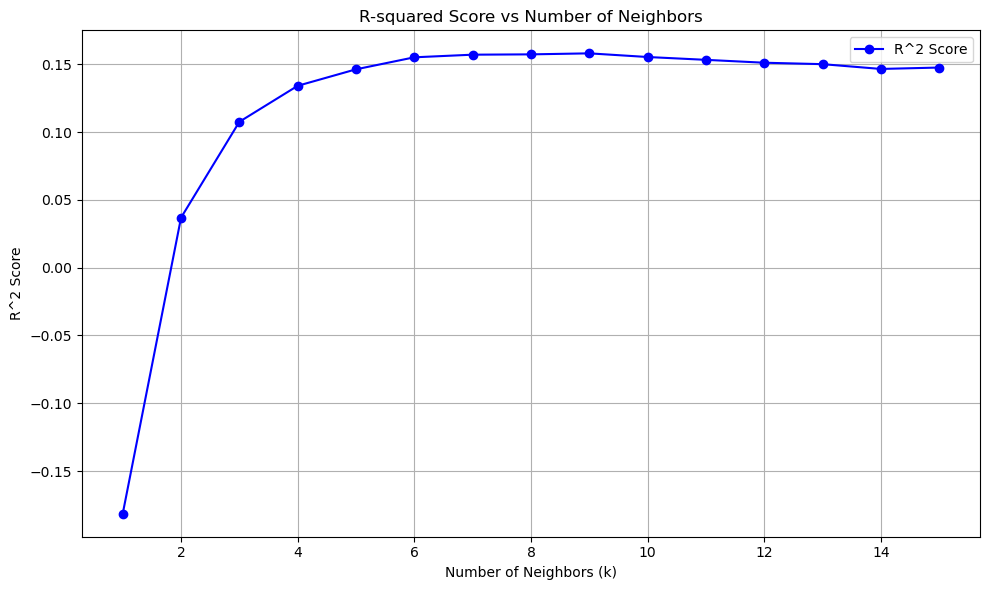

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of neighbors (k) to test
neighbors = range(1, 16)
all_scores = []

# Calculate R-squared scores for each value of k
for k in neighbors:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    all_scores.append(score)

# Plotting the R-squared scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, all_scores, marker='o', linestyle='-', color='b', label='R^2 Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.title('R-squared Score vs Number of Neighbors')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [126]:
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X  + np.random.randn(100,1)

# Add bias term(intercept)
X_b = np.c_[np.ones((100,1)), X]

# Display the first few rows of the dataset
print("First few rows of X_b:\n", X_b[:5])
print()
print()
print("First few rows of y:\n", y[:5])


First few rows of X_b:
 [[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]]


First few rows of y:
 [[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]]


In [127]:
theta = np.random.randn(2,1)

In [128]:
learning_rate = 0.01
n_epochs = 50

In [129]:
X[67]

array([1.60439396])

In [130]:
y[67]

array([8.99781574])

In [131]:
# define the number of iterations
m = len(X_b)

# SGD loop
for epoch in range(n_epochs):
    for i in range(m):

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        # compute gradients
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        
        # update parameters
        theta = theta - learning_rate * gradients

print("Final parameters:\n", theta)

Final parameters:
 [[4.16427183]
 [2.69207144]]


In [132]:
from sklearn.linear_model import SGDRegressor

# initialize SFD Regressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None,random_state=42)

# fit the model
sgd_reg.fit(X, y.ravel())

# display the parameters
print("Intercept:", sgd_reg.intercept_)
print("Coefficients:", sgd_reg.coef_)


Intercept: [3.87631571]
Coefficients: [3.07081154]


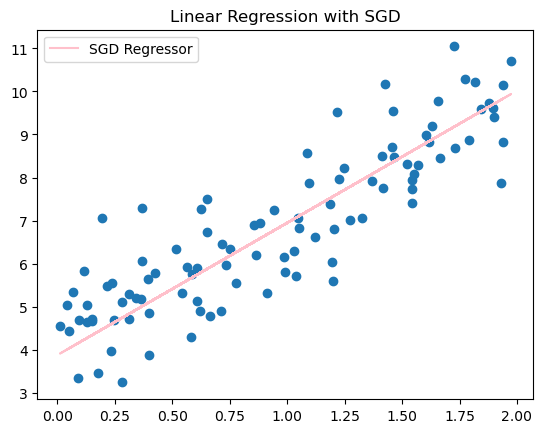

In [133]:

import matplotlib.pyplot as plt

b = sgd_reg.intercept_

w = sgd_reg.coef_

my_y = w*X + b

plt.scatter(X, y)
plt.plot(X,my_y, color = 'pink', label='SGD Regressor')
plt.title('Linear Regression with SGD')
plt.legend()
plt.show()


In [134]:
theta[1]

array([2.69207144])

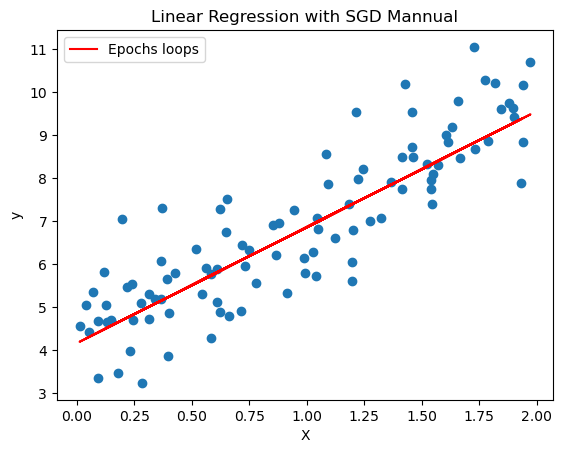

In [135]:
m = theta[1][0]
c = theta[0][0]

my_y = m*X + c

plt.scatter(X,y)
plt.plot(X, my_y, color='red', label='Epochs loops')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with SGD Mannual')
plt.legend()
plt.show()

In [136]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.datasets import *
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
california = fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [138]:
df = pd.DataFrame(california['data'],
                 columns = california['feature_names'])

df['target'] = california['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [139]:
X = california['data']
y = california['target']

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


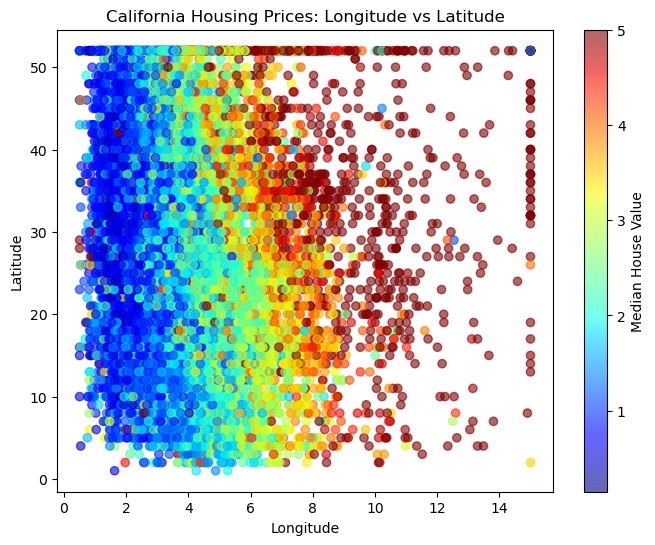

In [140]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices: Longitude vs Latitude')
plt.show()

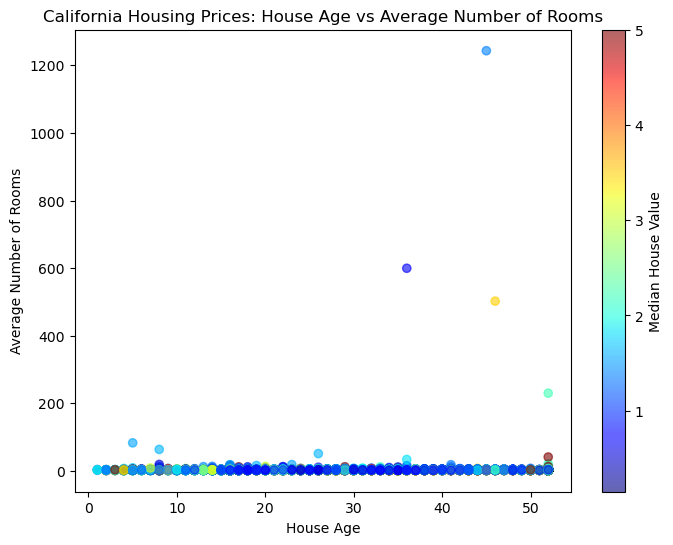

In [141]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 5], c=y, cmap='jet', alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('House Age')
plt.ylabel('Average Number of Rooms')
plt.title('California Housing Prices: House Age vs Average Number of Rooms')
plt.show()

In [142]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california = fetch_california_housing()

# Extract features (X) and target (y)
X = california.data  # Features
y = california.target  # Target (median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_regressor = SVR(kernel='linear')  # Specify kernel as linear for example
svr_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.58


In [151]:
svr_regressor = SVR(kernel='linear')  # Use linear kernel for example
svr_regressor.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [153]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california = fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_regressor = SVR(kernel='linear')  # Use linear kernel for example
svr_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.58


In [156]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california = fetch_california_housing()
X = california.data  # Features
y = california.target  # Target (median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_regressor = SVR(kernel='linear')  # Use linear kernel for example
svr_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(X_test_scaled)




In [158]:

import joblib

joblib.dump(model,'svcmodel2.pkl')

['svcmodel2.pkl']

In [159]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.5792291127963858
R-squared: 0.5579783697957059


In [160]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing

ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)


ada_model.fit(X_train, y_train)



AdaBoostRegressor(n_estimators=100, random_state=42)

In [161]:
y_pred_ada = ada_model.predict(X_test)

y_pred_ada

array([1.50521865, 1.66722178, 3.19108072, ..., 3.6206713 , 1.6876384 ,
       2.44308546])

In [162]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [163]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([0.50518761, 1.09334601, 4.24570956, ..., 4.68181295, 0.85329537,
       1.96275219])

In [164]:
import pandas as pd

data = {
    'Model A': [0.85, 0.75, 0.80], 
    'Model B': [0.82, 0.72, 0.78],
    'Model C': [0.88, 0.78, 0.82]
}

metrics = ['Accuracy', 'Precision', 'Recall']
model_per_df = pd.DataFrame(data, index=metrics)

print(model_per_df)

           Model A  Model B  Model C
Accuracy      0.85     0.82     0.88
Precision     0.75     0.72     0.78
Recall        0.80     0.78     0.82


     Model A  Model B  Model C
RF      0.85     0.82     0.88
ADA     0.75     0.72     0.78
GB      0.80     0.78     0.82


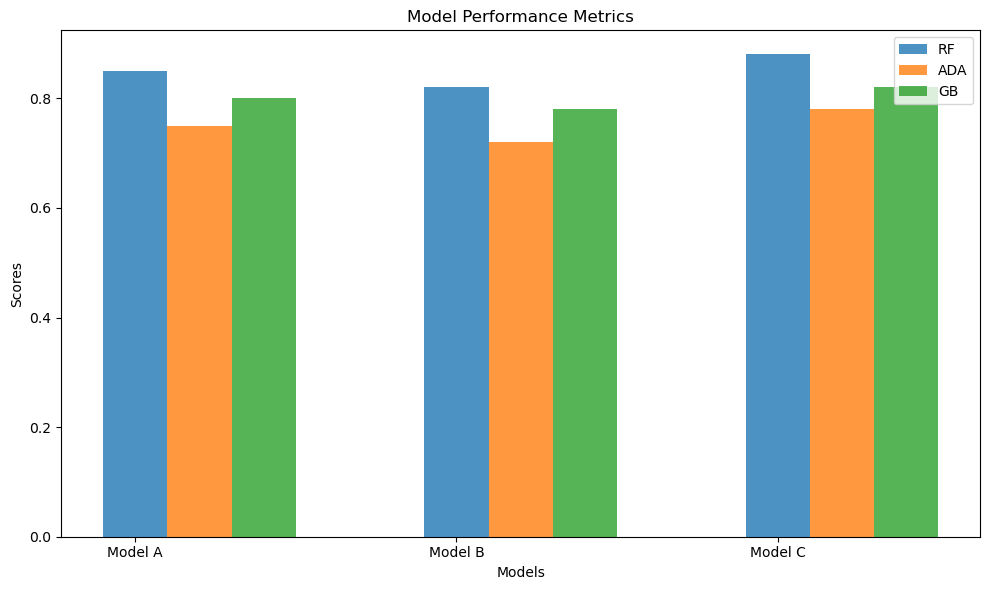

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Creating a dummy DataFrame with model performance metrics
data = {
    'Model A': [0.85, 0.75, 0.80],  # Example metrics: accuracy, precision, recall
    'Model B': [0.82, 0.72, 0.78],
    'Model C': [0.88, 0.78, 0.82]
}

metrics = ['RF', 'ADA', 'GB']
model_per_df = pd.DataFrame(data, index=metrics)

# Displaying the DataFrame
print(model_per_df)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
opacity = 0.8

# Position of bars on X-axis
index = range(len(model_per_df.columns))

# Plot each metric as a separate group of bars
for i, metric in enumerate(metrics):
    ax.bar([p + bar_width*i for p in index], model_per_df.loc[metric], bar_width, alpha=opacity, label=metric)


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index)
ax.set_xticklabels(model_per_df.columns)
ax.legend()

plt.tight_layout()
plt.show()


In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pandas as pd



# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
svc_reg = SVR()

# Compute R-squared scores using cross-validation
r2_linearregression = cross_val_score(linear_reg, X, y, cv=5, scoring='r2').mean()
r2_randomforestregressor = cross_val_score(rf_reg, X, y, cv=5, scoring='r2').mean()
r2_decisiontreeregressor = cross_val_score(dt_reg, X, y, cv=5, scoring='r2').mean()
r2_svc = cross_val_score(svc_reg, X, y, cv=5, scoring='r2').mean()

# Create a dictionary with model information
model_info = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'SVR'],
    'R-SQUARED': [r2_linearregression, r2_randomforestregressor, r2_decisiontreeregressor, r2_svc]
}

# Create DataFrame
performance = pd.DataFrame(model_info)
print(performance)


                     Model  R-SQUARED
0        Linear Regression   0.553031
1  Random Forest Regressor   0.651150
2  Decision Tree Regressor   0.345352
3                      SVR  -0.110119


In [168]:
performance[performance['R-SQUARED'] == performance['R-SQUARED'].max()]

,Model,R-SQUARED
1,Random Forest Regressor,0.65115
